Reto

El sector financiero es uno de los sectores que mayor cantidad de información maneja. Los datos provienen de clientes, mercado, productos, servicios y otras entidades. Desde tu departamento de analítica del banco, se plantea la necesidad de personalizar los impactos de comunicaciones de tarjetas de crédito en la banca digital y apps bancarias, para ello tenéis que identificar grupos de clientes que puedan responder de manera similar a las técnicas de marketing planteadas, generando mejores tasas de respuesta y mejores experiencias al consumidor.

La tarea que te han asignado es la de segmentar la cartera del público objetivo generando diferentes arquetipos que compartan características sociodemográficas, económicas y relacionales para identificar tendencias de comportamiento y dirigir adecuadamente las acciones comerciales.

A continuación, tendréis que responder razonadamente a los enunciados planteados, en base a lo trabajado en la asignatura y con la ayuda de los recursos de aprendizaje.

El dataset recoge el comportamiento de uso en € de titulares de tarjetas de crédito activas durante los últimos 6 meses. Podéis descargarlo desde la página de la PEC.

##### **Actividad 1: Preprocesamiento de datos**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

a. Análisis exploratorio del set de datos.

¿Cuántas observaciones y variables tiene el dataset? ¿Qué tipo de variables son?

<span style="color: darkblue;">
El dataset tiene 7994 observaciones y 18 variables, incluyendo datos sociodemográficos, económicos y de comportamiento de uso de tarjetas de crédito. Las variables son una mezcla de tipos numéricos (float64 e int64) y un identificador de cliente (object). Hay valores nulos en dos columnas: LIMITE_CREDITO tiene 1 valor nulo y IMPORTE_MINIMO_PAGOS tiene 283. 

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('r2_data_2024.csv')

# Número de observaciones (filas) y variables (columnas)
print(f"Número de observaciones: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}\n")

df.head().T

Número de observaciones: 7994
Número de variables: 18



,0,1,2,3,4
CUSTOMER_ID,C18658,C18844,C12288,C12767,C11595
SALDO_CUENTA,2.850024,469.319087,1504.334228,2061.835735,18.218714
FRECUENCIA_ACTUALIZACION_SALDO,0.181818,0.818182,0.909091,1.0,0.272727
IMPORTE_COMPRAS,114.56,383.81,565.0,0.0,89.0
IMPORTE_COMPRAS_ONOFF,0.0,0.0,565.0,0.0,0.0
IMPORTE_COMPRAS_APLAZO,114.56,383.81,0.0,0.0,89.0
IMPORTE_EFECTIVO_ADELANTADO,0.0,870.533909,0.0,4320.771337,0.0
FRECUENCIA_COMPRAS,0.25,0.583333,0.25,0.0,0.083333
FRECUENCIA_COMPRAS_APLAZO,0.25,0.5,0.0,0.0,0.083333
FRECUENCIA_EFECTIVO_ADELANTADO,0.0,0.333333,0.0,0.5,0.0


In [2]:
# Información sobre el tipo de datos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7994 entries, 0 to 7993
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CUSTOMER_ID                            7994 non-null   object 
 1   SALDO_CUENTA                           7994 non-null   float64
 2   FRECUENCIA_ACTUALIZACION_SALDO         7994 non-null   float64
 3   IMPORTE_COMPRAS                        7994 non-null   float64
 4   IMPORTE_COMPRAS_ONOFF                  7994 non-null   float64
 5   IMPORTE_COMPRAS_APLAZO                 7994 non-null   float64
 6   IMPORTE_EFECTIVO_ADELANTADO            7994 non-null   float64
 7   FRECUENCIA_COMPRAS                     7994 non-null   float64
 8   FRECUENCIA_COMPRAS_APLAZO              7994 non-null   float64
 9   FRECUENCIA_EFECTIVO_ADELANTADO         7994 non-null   float64
 10  NUM_TRANSACCIONES_EFECTIVO_ADELANTADO  7994 non-null   int64  
 11  NUM_

In [3]:
# Revisión de valores faltantes
print(f"Valores nulos por atributos:\n\n{df.isnull().sum()}")

Valores nulos por atributos:

CUSTOMER_ID                                0
SALDO_CUENTA                               0
FRECUENCIA_ACTUALIZACION_SALDO             0
IMPORTE_COMPRAS                            0
IMPORTE_COMPRAS_ONOFF                      0
IMPORTE_COMPRAS_APLAZO                     0
IMPORTE_EFECTIVO_ADELANTADO                0
FRECUENCIA_COMPRAS                         0
FRECUENCIA_COMPRAS_APLAZO                  0
FRECUENCIA_EFECTIVO_ADELANTADO             0
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO      0
NUM_TRANSACCIONES_COMPRAS                  0
LIMITE_CREDITO                             1
IMPORTE_PAGOS                              0
IMPORTE_MINIMO_PAGOS                     283
TOTAL_TARJ_CREDITO                         0
TOTAL_VISITAS_ONLINE                       0
TOTAL_VISITAS_OFICINA                      0
dtype: int64


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**b. Resumen estadístico de cada variable**.

Eliminamos la variable CUSTOMER_ID del dataset ya que no contiene valor para el clustering. Utilizando la función describe, ¿qué medidas estadísticas destacarías dados los valores obtenidos para cada variable? ¿Puedes suponer a partir de estas medidas qué variables tienen outliers?

<span style="color: darkblue;">

Las variables SALDO_CUENTA, IMPORTE_COMPRAS, IMPORTE_COMPRAS_ONOFF, IMPORTE_COMPRAS_APLAZO, IMPORTE_EFECTIVO_ADELANTADO, y IMPORTE_MINIMO_PAGOS muestran claros indicios de outliers debido a sus valores máximos extremadamente altos en comparación con las medianas, y una alta desviación estándar. La diferencia notable entre la media y la mediana en estas variables sugiere distribuciones sesgadas. Especialmente, IMPORTE_MINIMO_PAGOS y NUM_TRANSACCIONES_EFECTIVO_ADELANTADO destacan por la gran disparidad entre el 75% de los datos y los valores máximos, indicando la presencia de valores atípicos significativos.

In [4]:
# Eliminar la columna CUSTOMER_ID
df = df.drop(columns=['CUSTOMER_ID'])

# Obtener el resumen estadístico de cada variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SALDO_CUENTA,7994.0,1546.309503,2056.495837,0.000000,126.134981,864.868214,2014.959018,19043.13856
FRECUENCIA_ACTUALIZACION_SALDO,7994.0,0.877281,0.236988,0.000000,0.888889,1.000000,1.000000,1.00000
IMPORTE_COMPRAS,7994.0,980.533134,1954.559070,0.000000,35.925000,354.565000,1099.545000,32539.78000
IMPORTE_COMPRAS_ONOFF,7994.0,572.496469,1476.628493,0.000000,0.000000,31.695000,564.000000,26547.43000
IMPORTE_COMPRAS_APLAZO,7994.0,408.337100,896.445531,0.000000,0.000000,88.915000,466.722500,22500.00000
IMPORTE_EFECTIVO_ADELANTADO,7994.0,968.399100,2049.667814,0.000000,0.000000,0.000000,1105.841330,29282.10915
FRECUENCIA_COMPRAS,7994.0,0.488379,0.401801,0.000000,0.083333,0.500000,0.916667,1.00000
FRECUENCIA_COMPRAS_APLAZO,7994.0,0.363533,0.396713,0.000000,0.000000,0.166667,0.750000,1.00000
FRECUENCIA_EFECTIVO_ADELANTADO,7994.0,0.134831,0.199833,0.000000,0.000000,0.000000,0.222222,1.50000
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,7994.0,3.222042,6.664906,0.000000,0.000000,0.000000,4.000000,123.00000


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**c. Relación entre variables.**

Para analizar la interacción entre variables:

1. Utilizando la función pairplot representa un gráfico bivariado de las variables: importe de compras, importe de compra realizado en una sola vez (onoff), frecuencia con la que se realizan las compras y frecuencia con la que se realizan compras a plazos.

2. Calcula la matriz de correlación del dataset. ¿Qué nos indica?

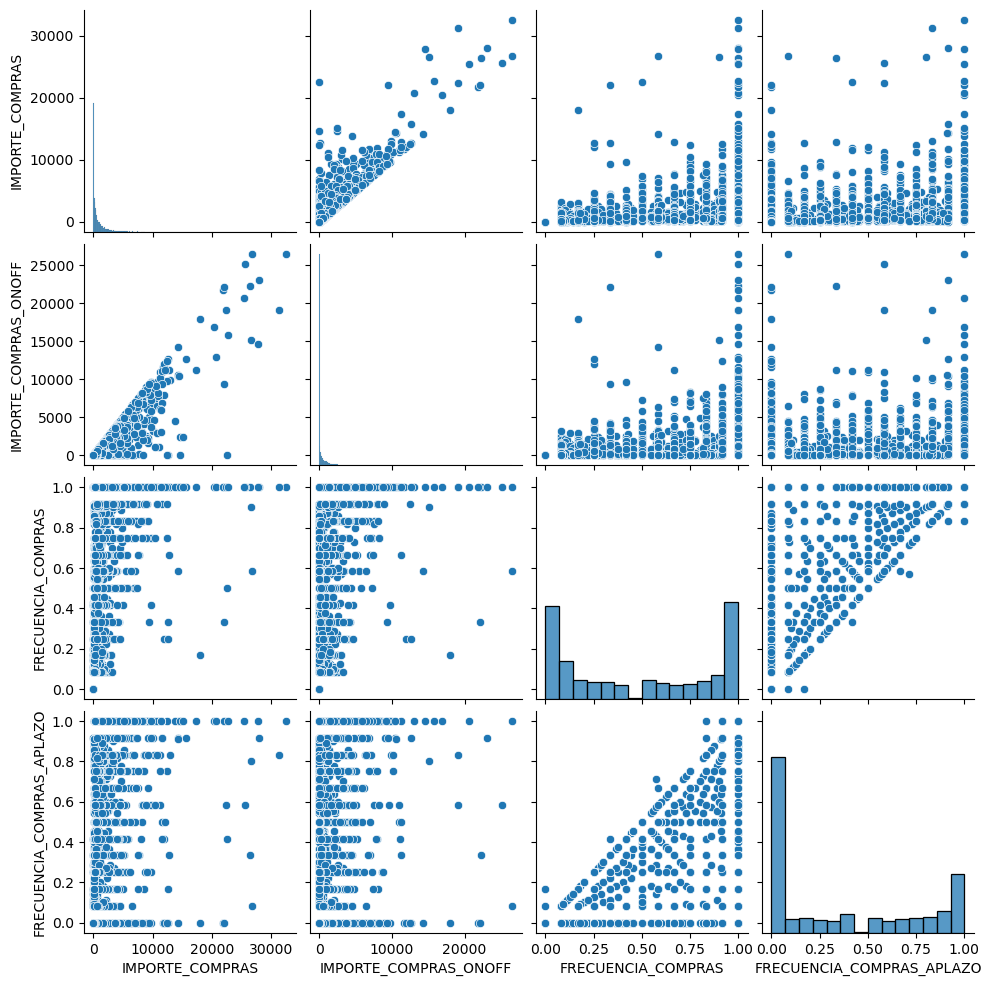

In [5]:
import warnings
import seaborn as sns

# Ignorar los FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Seleccionar solo las columnas de interés
columns_of_interest = ['IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 
                       'FRECUENCIA_COMPRAS', 'FRECUENCIA_COMPRAS_APLAZO']
subset_df = df[columns_of_interest]

# Crear el pairplot
sns.pairplot(subset_df)


In [6]:
# Calcular la matriz de correlación
correlation_matrix = subset_df.corr()

# Mostrar la matriz de correlación
correlation_matrix


,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO
IMPORTE_COMPRAS,1.000000,0.900496,0.417897,0.330245
IMPORTE_COMPRAS_ONOFF,0.900496,1.000000,0.284697,0.127408
FRECUENCIA_COMPRAS,0.417897,0.284697,1.000000,0.864157
FRECUENCIA_COMPRAS_APLAZO,0.330245,0.127408,0.864157,1.000000


<span style="color: darkblue;">


La matriz de correlación confirma estas observaciones cuantitativamente:

* IMPORTE_COMPRAS y IMPORTE_COMPRAS_ONOFF tienen una alta correlación de 0.900496, lo que sugiere que cuando los clientes gastan más en total, también tienden a hacer compras significativas en una sola transacción.

* FRECUENCIA_COMPRAS y FRECUENCIA_COMPRAS_APLAZO muestran una correlación muy alta de 0.864157, indicando que los clientes que compran con frecuencia también tienden a hacer compras a plazo frecuentemente.


Veamos para el df completo:

In [7]:
import plotly.figure_factory as ff

# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea los labels para los ejes
labels = correlation_matrix.columns.tolist()

# Crea el mapa de calor de Plotly
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.to_numpy(),  # Los valores de correlación
    x=labels,                         # Etiquetas del eje X
    y=labels,                         # Etiquetas del eje Y
    annotation_text=correlation_matrix.round(2).to_numpy(),  # Texto de anotación
    showscale=True,                   # Barra de colores
    colorscale='Portland'             # Escala de colores
)

fig.update_layout(
    margin=dict(t=50, l=200),
    width=1000,  
    height=800,
)


fig.show()

<span style="color: darkblue;">

Las correlaciones fuertes en el mapa pueden indicar redundancia de información. Por ejemplo, si dos variables están altamente correlacionadas, podríamos considerar utilizar solo una de ellas para modelos predictivos o análisis para evitar la multicolinealidad.

Las variables que tienen fuertes correlaciones positivas o negativas con otras pueden ser candidatas para análisis más detallados, como la construcción de modelos predictivos, ya que estas relaciones podrían sugerir patrones subyacentes interesantes.

En el contexto del aprendizaje automático, la multicolinealidad (altas correlaciones entre variables predictoras) puede afectar el rendimiento de ciertos algoritmos. Este mapa de calor puede ayudar a identificar y eliminar variables redundantes antes de proceder con el modelado.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**d. Tratamiento de outliers.**

Sobre el dataset debéis hacer un estudio de los outliers de cada variable y comprobar si las suposiciones en el apartado b eran correctas. Para poder hacerlo, podéis apoyaros en el rango intercuartílico (IQR). ¿Qué variables tienen outliers y en qué volumen?
Representa con gráficos Box-Plot la siguiente información:

1. Boxplot para la distribución del no de tarjetas de crédito por límite establecido de la tarjeta.
2. Boxplot para la distribución del no de tarjetas de crédito en función de la frecuencia de la actualización del saldo en cuenta.
   
En base a la interpretación del apartado c y d, justifica si es necesario eliminar los outliers o tratarlos como valores extremos porque pueden contener información importante para el clustering.

<span style="color: darkblue;">

Dada la interpretación de los apartados c y d, si los valores extremos reflejan el comportamiento real de los clientes, y ese comportamiento es relevante para el objetivo de negocio (por ejemplo, identificar a los grandes gastadores para ofrecerles productos premium), entonces esos outliers no deben eliminarse. En cambio, si el objetivo es entender el comportamiento del "cliente promedio", puede ser justificable eliminar los outliers para obtener un modelo más representativo de este segmento de clientes.

**Eliminar Outliers**: Si los outliers son el resultado de errores de medición o captura de datos y no representan comportamientos de cliente reales, probablemente deberían ser eliminados.

**Mantener Outliers**: Si los outliers representan un segmento válido de la base de clientes (por ejemplo, grandes gastadores o clientes con comportamientos de compra inusuales pero legítimos), pueden ser críticos para el análisis de clustering y, por tanto, deben mantenerse.

In [8]:
# Ejemplo de cómo calcular el IQR para cada variable
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determinar outliers utilizando el IQR
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)

SALDO_CUENTA                              640
FRECUENCIA_ACTUALIZACION_SALDO           1332
IMPORTE_COMPRAS                           717
IMPORTE_COMPRAS_ONOFF                     914
IMPORTE_COMPRAS_APLAZO                    775
IMPORTE_EFECTIVO_ADELANTADO               919
FRECUENCIA_COMPRAS                          0
FRECUENCIA_COMPRAS_APLAZO                   0
FRECUENCIA_EFECTIVO_ADELANTADO            468
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO     715
NUM_TRANSACCIONES_COMPRAS                 673
LIMITE_CREDITO                            188
IMPORTE_PAGOS                             716
IMPORTE_MINIMO_PAGOS                      753
TOTAL_TARJ_CREDITO                       1223
TOTAL_VISITAS_ONLINE                        0
TOTAL_VISITAS_OFICINA                       0
dtype: int64


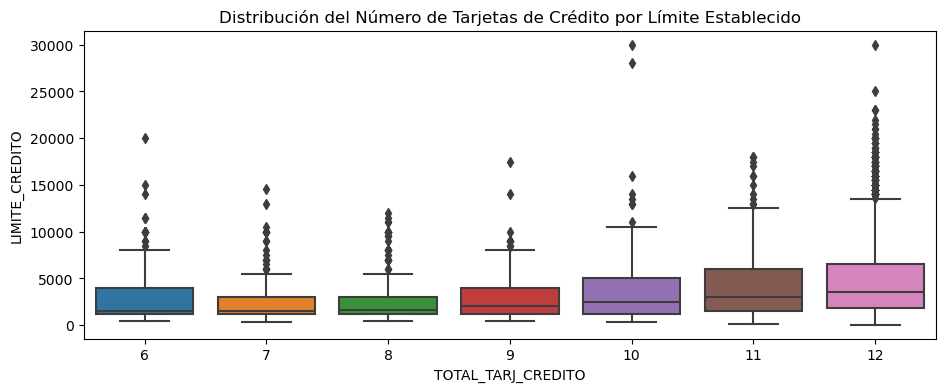

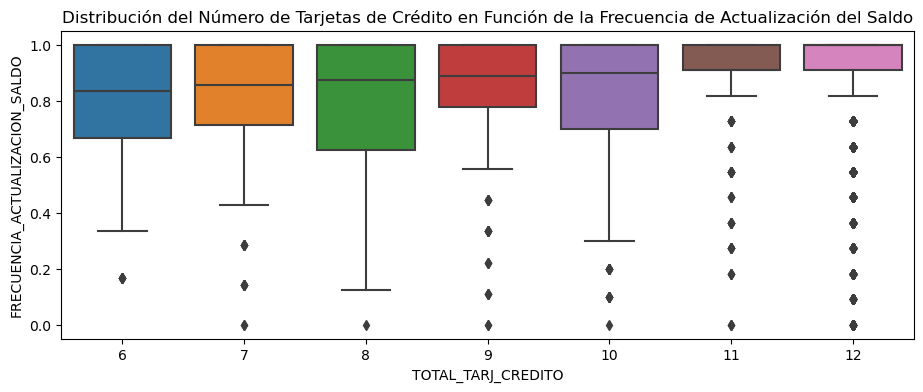

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# i. Boxplot para la distribución del número de tarjetas de crédito por límite establecido de la tarjeta
plt.figure(figsize=(11, 4))
sns.boxplot(x='TOTAL_TARJ_CREDITO', y='LIMITE_CREDITO', data=df)
plt.title('Distribución del Número de Tarjetas de Crédito por Límite Establecido')
plt.show()

# ii. Boxplot para la distribución del número de tarjetas de crédito en función de la frecuencia de actualización del saldo en cuenta
plt.figure(figsize=(11, 4))
sns.boxplot(x='TOTAL_TARJ_CREDITO', y='FRECUENCIA_ACTUALIZACION_SALDO', data=df)
plt.title('Distribución del Número de Tarjetas de Crédito en Función de la Frecuencia de Actualización del Saldo')
plt.show()



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**e. Tratamiento de valores nulos.**

¿Cuáles son las variables que tienen valores nulos y en qué volumen? Hay varias formas de tratar los valores nulos, ¿cuál crees que sería la más correcta en este caso: eliminar las observaciones o imputar los valores faltantes? Debéis valorar y justificar el método usado, de ser imputación, usad k-Nearest Neighbors.

<span style="color: darkblue;">

Las variables que tienen valores nulos, según la información previamente proporcionada, son LIMITE_CREDITO con 1 valor nulo y IMPORTE_MINIMO_PAGOS con 283 valores nulos. El tratamiento de estos valores nulos debe considerar tanto la cantidad de datos faltantes como la importancia de las variables para el análisis.

**Eliminar las Observaciones**:  
* Ventajas: La ventaja de eliminar observaciones es que es un método simple y no introduce sesgo adicional en el dataset.
* Desventajas: La desventaja es la pérdida de información, que podría ser importante si los datos eliminados no son completamente aleatorios o si representan un porcentaje significativo del dataset.

En este caso, eliminar la única observación con LIMITE_CREDITO faltante podría ser aceptable dado que es un caso aislado de 7994 entradas. Sin embargo, eliminar las 283 observaciones con IMPORTE_MINIMO_PAGOS faltantes puede no ser lo ideal, ya que representa alrededor del 3.5% del dataset.

**Imputar los Valores Faltantes:**
* Ventajas: La imputación puede ayudar a conservar datos valiosos que serían descartados si las observaciones fueran eliminadas.
* Desventajas: La desventaja es el riesgo de introducir sesgo si la imputación no se realiza cuidadosamente.

La imputación mediante k-Nearest Neighbors (k-NN) puede ser una buena opción aquí, ya que este método permite estimar el valor faltante utilizando los datos más similares dentro del dataset. La imputación con k-NN es particularmente útil cuando la relación entre las variables es compleja y no lineal, lo cual podría ser el caso en un conjunto de datos financieros con múltiples interacciones entre las características de los clientes.

In [10]:
from sklearn.impute import KNNImputer

# Crear el imputador con k vecinos (k puede ser elegido basado en pruebas o validación cruzada)
imputer = KNNImputer(n_neighbors=5)

# Aplicar la imputación al dataframe (o a las columnas seleccionadas con valores nulos)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Verificar
print(df_imputed.isnull().sum())


SALDO_CUENTA                             0
FRECUENCIA_ACTUALIZACION_SALDO           0
IMPORTE_COMPRAS                          0
IMPORTE_COMPRAS_ONOFF                    0
IMPORTE_COMPRAS_APLAZO                   0
IMPORTE_EFECTIVO_ADELANTADO              0
FRECUENCIA_COMPRAS                       0
FRECUENCIA_COMPRAS_APLAZO                0
FRECUENCIA_EFECTIVO_ADELANTADO           0
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO    0
NUM_TRANSACCIONES_COMPRAS                0
LIMITE_CREDITO                           0
IMPORTE_PAGOS                            0
IMPORTE_MINIMO_PAGOS                     0
TOTAL_TARJ_CREDITO                       0
TOTAL_VISITAS_ONLINE                     0
TOTAL_VISITAS_OFICINA                    0
dtype: int64


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**f. Estandarización de los datos.**

¿Tienen las variables las mismas unidades o es necesario escalarlas? ¿Es necesario estandarizar los datos si vamos a utilizar técnicas clustering? Justifica tu respuesta, si es que sí podéis utilizar la función scale del módulo preprocessing de sklearn y debéis guardar los datos en datos_scaled.

<span style="color: darkblue;">

La estandarización de los datos es un paso importante en la preparación de datos para algoritmos de clustering, como k-means o DBSCAN, que son sensibles a la escala de las variables. Dado que diferentes variables pueden tener diferentes unidades y rangos de valores, algoritmos que dependen de la distancia entre puntos (como k-means) podrían sesgarse hacia variables con mayor varianza.

Mirando las variables listadas:

* Variables como SALDO_CUENTA, IMPORTE_COMPRAS, IMPORTE_COMPRAS_ONOFF, IMPORTE_EFECTIVO_ADELANTADO, IMPORTE_PAGOS, y IMPORTE_MINIMO_PAGOS varían en miles, mientras que otras como FRECUENCIA_ACTUALIZACION_SALDO, FRECUENCIA_COMPRAS, y FRECUENCIA_COMPRAS_APLAZO varían entre 0 y 1.
* NUM_TRANSACCIONES_EFECTIVO_ADELANTADO, NUM_TRANSACCIONES_COMPRAS, TOTAL_VISITAS_ONLINE, y TOTAL_VISITAS_OFICINA son conteos y pueden tener diferentes rangos.
* LIMITE_CREDITO y TOTAL_TARJ_CREDITO también varían ampliamente en magnitud.
  
Dado que las unidades y escalas varían considerablemente, es necesario estandarizar las variables para asegurar que cada una contribuya equitativamente al análisis de clustering. La estandarización transforma los datos para tener una media de cero y una desviación estándar de uno, lo que permite que el algoritmo de clustering trate a todas las variables por igual en términos de importancia.

Después de estandarizar los datos, todas las variables tendrán un peso igual en los algoritmos de clustering

In [11]:
from sklearn.preprocessing import scale

# Estandarizar las variables
data_scaled = scale(df_imputed)

# Ahora 'datos_scaled' es un array numpy con los datos estandarizados, si quieres convertirlo a DataFrame:
df_scaled = pd.DataFrame(data_scaled, columns=df.columns)

# Verificar los datos estandarizados
df_scaled.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
SALDO_CUENTA,7994.0,-0.0,1.0,-0.75,-0.69,-0.33,0.23,8.51
FRECUENCIA_ACTUALIZACION_SALDO,7994.0,0.0,1.0,-3.70,0.05,0.52,0.52,0.52
IMPORTE_COMPRAS,7994.0,0.0,1.0,-0.50,-0.48,-0.32,0.06,16.15
IMPORTE_COMPRAS_ONOFF,7994.0,0.0,1.0,-0.39,-0.39,-0.37,-0.01,17.59
IMPORTE_COMPRAS_APLAZO,7994.0,-0.0,1.0,-0.46,-0.46,-0.36,0.07,24.65
IMPORTE_EFECTIVO_ADELANTADO,7994.0,0.0,1.0,-0.47,-0.47,-0.47,0.07,13.81
FRECUENCIA_COMPRAS,7994.0,0.0,1.0,-1.22,-1.01,0.03,1.07,1.27
FRECUENCIA_COMPRAS_APLAZO,7994.0,0.0,1.0,-0.92,-0.92,-0.50,0.97,1.60
FRECUENCIA_EFECTIVO_ADELANTADO,7994.0,-0.0,1.0,-0.67,-0.67,-0.67,0.44,6.83
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,7994.0,0.0,1.0,-0.48,-0.48,-0.48,0.12,17.97


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**g. Reducción de la dimensionalidad**

Realiza el PCA sobre datos_scaled. En base a la relación de varianza explicada por cada componente, justifica el no razonable de componentes principales para obtener una mejor solución en el clustering y guardalos en datos_pca formato dataframe.

In [12]:
from sklearn.decomposition import PCA
import pandas as pd


pca = PCA()
pca.fit(data_scaled)

# Calcular la varianza explicada acumulativa para determinar el número de componentes
varianza_explicada_acumulativa = pca.explained_variance_ratio_.cumsum()

# Identificar el número de componentes necesarios para explicar, por ejemplo, el 80% de la varianza
n_componentes = sum(varianza_explicada_acumulativa < 0.80) + 1

# Realizar PCA con el número de componentes identificados
pca = PCA(n_components=n_componentes)
datos_pca = pca.fit_transform(data_scaled)

# Convertir el resultado a un dataframe para su uso posterior
datos_pca = pd.DataFrame(datos_pca, columns=[f'PC{i+1}' for i in range(n_componentes)])

# Mostrar la varianza explicada por cada componente
print(pca.explained_variance_ratio_)

# Guardar en un DataFrame para uso futuro
datos_pca_df = pd.DataFrame(datos_pca)
datos_pca_df.head()


[0.24733407 0.19753054 0.08513956 0.06996717 0.05973118 0.0579919
 0.05463764 0.05144032]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.694040,-1.586078,1.549814,-0.339763,1.305122,0.178356,-0.042226,-1.618416
1,-0.649181,-0.138600,-0.702640,-0.661899,-0.307287,-1.427660,-0.501233,-0.103696
2,-0.882106,-0.414826,0.677587,0.905590,-2.240020,0.461876,0.311791,0.508554
3,-1.150027,3.066576,0.252240,-0.453548,-0.469745,-1.467719,-0.921237,0.058026
4,-1.689215,-1.091011,1.871307,0.103577,0.848507,0.503760,-0.022962,-1.520796


<span style="color: darkblue;">
Los valores [0.24733407, 0.19753054, 0.08513956, 0.06996717, 0.05973118, 0.0579919, 0.05463764, 0.05144032] representan la varianza explicada por cada componente principal. Es decir el primer componente principal es el más significativo, capturando casi un cuarto de toda la varianza en los datos, mientras que cada componente subsiguiente captura progresivamente menos varianza.
<br>

PCA es una técnica de reducción de dimensionalidad que transforma un conjunto de variables posiblemente correlacionadas en un conjunto de valores de variables no correlacionadas. Estas nuevas variables, los componentes principales, se ordenan de modo que los primeros pocos retengan la mayor parte de la variación presente en todos los datos originales.


##### **Actividad 2: Métodos clustering**

Dada la importancia de los métodos clustering se han desarrollado multitud de variantes y adaptaciones de sus métodos y algoritmos. Pueden diferenciarse en tres grupos principales:
* **Métodos de asignación (Partitioning Clustering)**: este tipo de algoritmos requieren que el usuario especifique de antemano el número de clusters que se van a crear (K-means, K-medoids, CLARA).
* **Clasificación jerárquica (Hierarchical Clustering)**: este tipo de algoritmos no requieren que el usuario especifique de antemano el número de clusters. (agglomerative clustering, divisive clustering).
* **Métodos que combinan o modifican los anteriores (hierarchical K-means, fuzzy clustering, model based clustering y density based clustering)**.
Para realizar esta actividad se recomienda utilizar el módulo clustering de Scikit-Learn de Python, que contiene implementaciones de los principales algoritmos a utilizar.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**1. Métodos de asignación (Partitioning Clustering)**

Se recomienda utilizar la función KMeans del módulo clustering de sklearn.

**a. K=No óptimo de clústers.**  

Los métodos más utilizados son:

* El método Elbow
* Coeficiente de silhouette (sklearn ofrece una guía avanzada.)
* Estadístico de Gap.
* Coeficiente de Calinsky.
* Coeficiente Davies-Bouldin.

Aplica dos de los métodos nombrados sobre el set de datos_pca, razonando la elección de K. Recordad que no hay respuesta definitiva para encontrar el no óptimo de clusters, pero hay que justificar la elección. También se pueden utilizar otros métodos estadísticos de diagnóstico o visualizaciones para interpretar y evaluar los clusters.

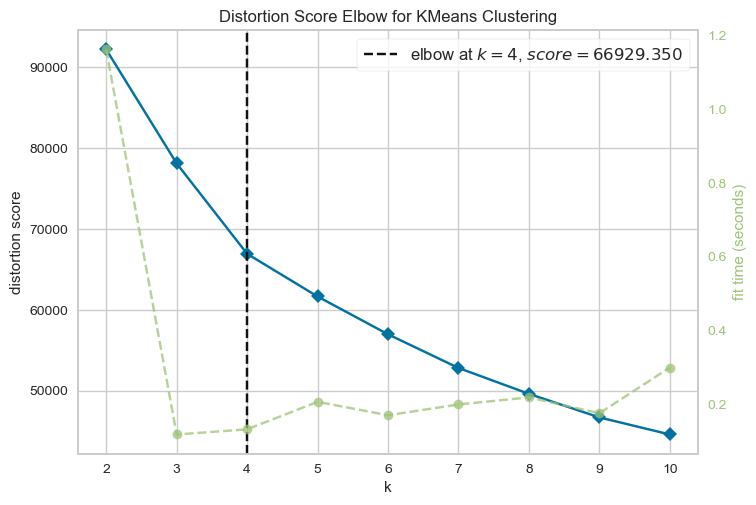

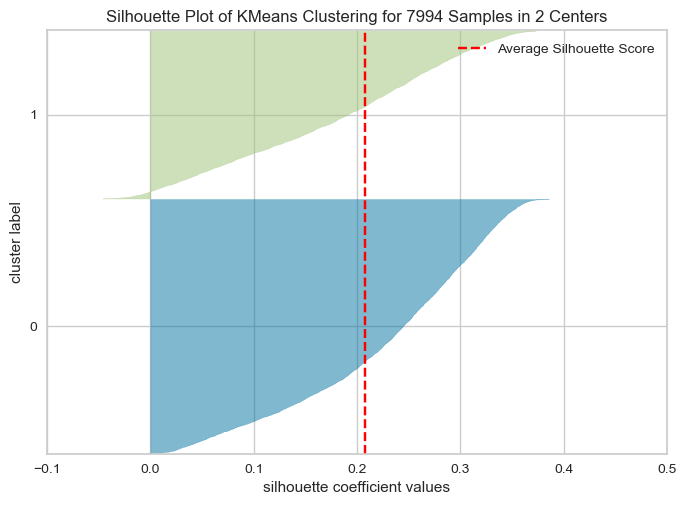

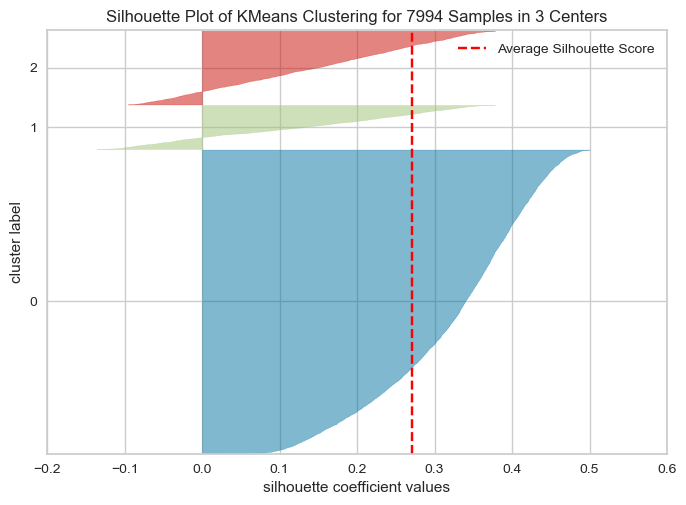

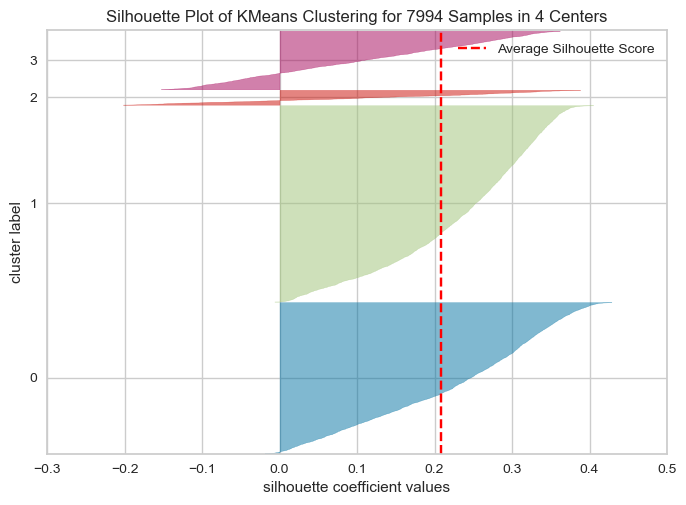

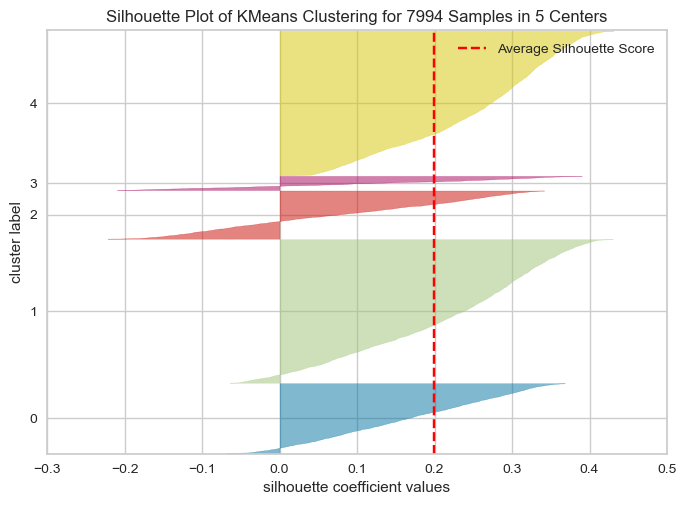

In [13]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import KMeans

# Método Elbow con Yellowbrick
visualizer = KElbowVisualizer(KMeans(), k=(2,11), timings=True)
visualizer.fit(datos_pca)
visualizer.show()

# Coeficiente de Silhouette con Yellowbrick
# Esto visualizará el coeficiente para cada k de 2 a 11
for k in range(2, 6):
    modelo_kmeans = KMeans(n_clusters=k)
    visualizer = SilhouetteVisualizer(modelo_kmeans, colors='yellowbrick')
    visualizer.fit(datos_pca)
    visualizer.show()


<span style="color: darkblue;">

El método Elbow y el coeficiente de Silhouette ofrecen perspectivas diferentes. El método Elbow se enfoca más en la variación total explicada dentro de los clústeres, mientras que el coeficiente de Silhouette se centra en la cohesión y la separación de los clústeres individuales.

**Método Elbow** : La línea punteada marca un "codo" sugerido en $k=4$, parece razonable según este gráfico, ya que más allá de este punto las mejoras son marginales y se obtiene una ley de rendimientos decrecientes. La decisión de si este es el número óptimo de clústeres también debe estar guiada por la interpretación de los clústeres resultantes y la relevancia para el problema o dominio específico que estás analizando.

**Método Silhouette** : 

* k = 2: Hay dos grupos bien diferenciados y de tamaños comparables, lo que podría facilitar estrategias de marketing binarias. Sin embargo, puede ser demasiado simplista para capturar la complejidad y diversidad de comportamientos en una base de clientes bancarios.

* k = 3: Este escenario proporciona un nivel adicional de granularidad, lo que puede ser útil para identificar un segmento de clientes intermedio que no se ajusta a los otros dos. La cohesión y separación de los clústeres aún parecen razonables en este número de clústeres.

* k = 4: Introduce aún más detalle en la segmentación, lo que puede ser útil si se sospecha que hay subgrupos de comportamiento más matizados en la base de clientes. Sin embargo, uno de los clústeres parece ser bastante pequeño y menos cohesivo, lo que podría indicar que se está sobre-segmentando.

Dado que el objetivo es personalizar la comunicación de las tarjetas de crédito y suponiendo que hay una variedad de productos y ofertas, una segmentación más matizada puede ser valiosa. Por lo tanto, me inclinaría hacia k = 3 por las siguientes razones:

* Ofrece un equilibrio entre la sobresimplificación y la sobre-segmentación.
* Aún se mantiene una calidad razonable en términos de cohesión y separación de clústeres.
* Proporciona una diferenciación suficiente que puede alinearse con distintas necesidades y preferencias de los clientes relacionadas con productos de tarjetas de crédito.

La evidencia del gráfico Elbow, me hace considerar también $k=4$ para la segmentación de clientes, ya que podría reflejar una estructura subyacente más precisa dentro de los datos. Especialmente en aplicaciones de negocio como la segmentación de clientes para marketing personalizado, un cuarto clúster podría ofrecer una distinción valiosa entre los clientes que podría ser relevante para diferentes tipos de ofertas de tarjetas de crédito..

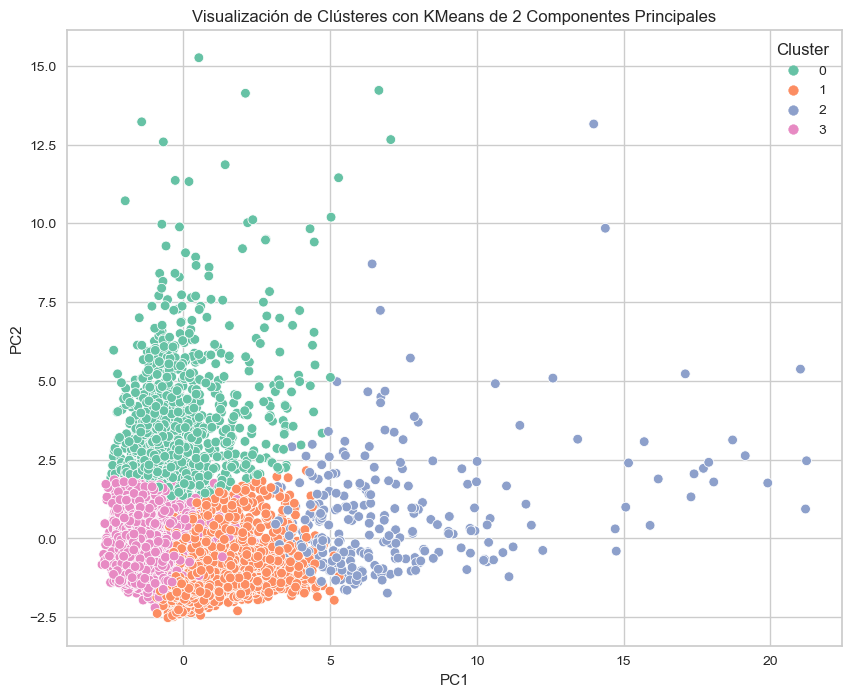

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutamos KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(datos_pca_df)

# Añadimos las etiquetas del clúster al DataFrame de datos_pca para la visualización
datos_pca_df['Cluster'] = clusters

# Para la visualización, seleccionamos solo las dos primeras componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=datos_pca_df, palette='Set2')
plt.title('Visualización de Clústeres con KMeans de 2 Componentes Principales')
plt.show()




##### **2. Métodos jerárquicos (Hierarchical Clustering)**

Se recomienda utilizar la librería [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) de [Scikit-Learn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) y para la representación dendogram del módulo hierarchy de Spicy.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**a. Corte del dendograma**

Para poder aplicar este algoritmo hay que escoger una medida de distancia y un tipo de linkage. Sobre datos_pca, compara los resultados con los linkage complete y ward visualizando los dendrogramas. ¿Qué conclusión sacas? ¿A qué altura te parece adecuado cortar para generar los clusters?

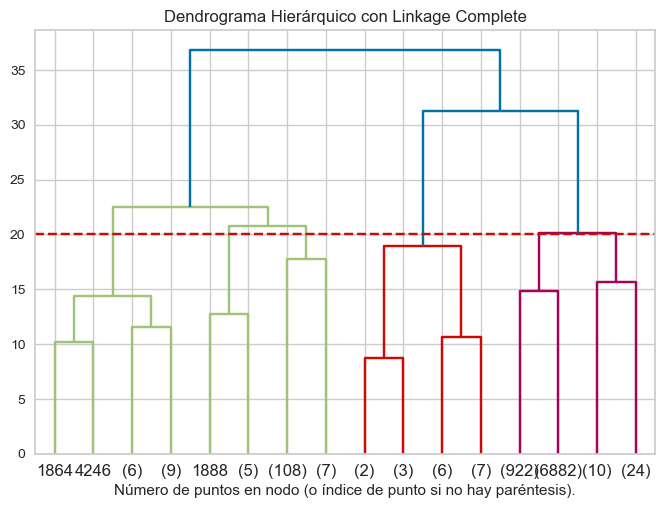

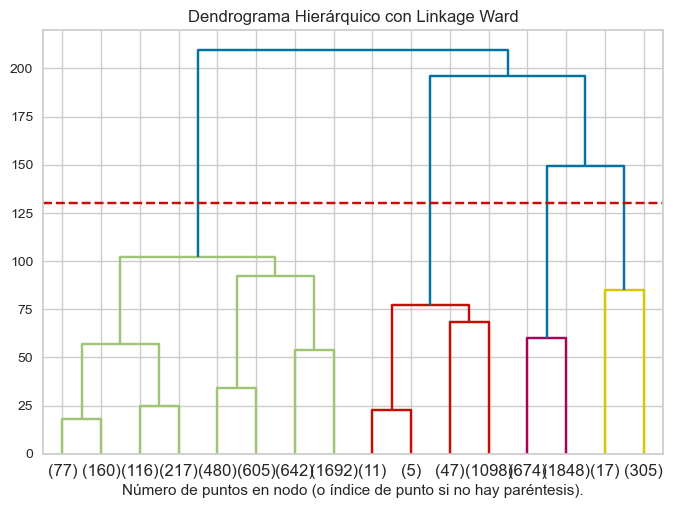

In [15]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Función para trazar el dendrograma
def plot_dendrogram(model, **kwargs):
    # Crear el conteo de las muestras contenidas en cada clúster.
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # hoja del nodo
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Trazar el dendrograma correspondiente
    dendrogram(linkage_matrix, **kwargs)

# Aplicamos AgglomerativeClustering con linkage 'complete'
model_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model_complete = model_complete.fit(datos_pca_df)

plt.title('Dendrograma Hierárquico con Linkage Complete')
# trazar el dendrograma de alta calidad
plot_dendrogram(model_complete, truncate_mode='level', p=3)
plt.axhline(y=20, color='r', linestyle='--')
plt.xlabel("Número de puntos en nodo (o índice de punto si no hay paréntesis).")
plt.show()

# Aplicamos AgglomerativeClustering con linkage 'ward'
model_ward = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model_ward = model_ward.fit(datos_pca_df)

plt.title('Dendrograma Hierárquico con Linkage Ward')
plot_dendrogram(model_ward, truncate_mode='level', p=3)
plt.axhline(y=130, color='r', linestyle='--')
plt.xlabel("Número de puntos en nodo (o índice de punto si no hay paréntesis).")
plt.show()


<span style="color: darkblue;">

La altura de as ramas representa la similutd entre los clusters. Así, las ramas más cortas indican clústeres más similares o cercanos entre sí, mientras que las ramas más largas indican una mayor disimilitud o distancia.   

Para determinar dónde colocar la línea de corte, generalmente buscamos una altura que resulte en clústeres significativos y manejables en tamaño para el análisis. Queremos que estos clústeres sean lo suficientemente distintos entre sí para que las estrategias de marketing puedan ser personalizadas y eficaces. Deseamos segmentar en un número de clústeres que refleje diferentes perfiles de comportamiento de los clientes en relación con los productos y servicios financieros. Dado que la segmentación es para personalizar comunicaciones de tarjetas de crédito, no solo estamos buscando diferencias generales, sino agrupaciones que puedan indicar diferentes necesidades o respuestas a estrategias de marketing.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**b. Creación del modelo**

Entrena el modelo aglomerativo indicando el valor óptimo del número de cluster escogido en el apartado a, la distancia y el [linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) que te parezca más adecuado. A continuación, realiza la visualización del resultado con 2 componentes principales de datos_pca. Puedes recurrir a recursos externos como el libro [K-Means and hierarchical clustering with Python](https://www.oreilly.com/library/view/k-means-and-hierarchical/9781491965306/).

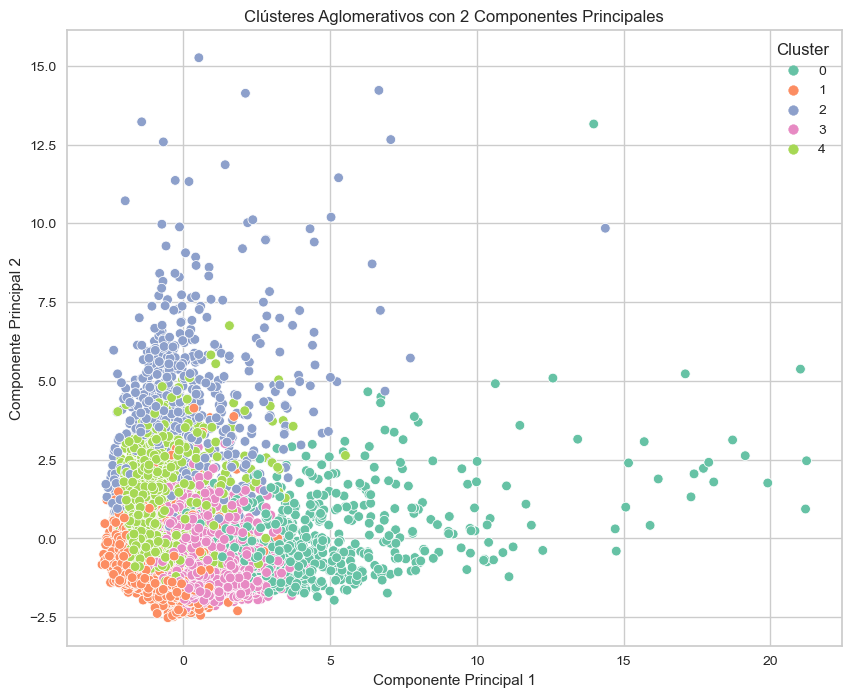

In [16]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


# Tiene más columnas (como 'Cluster' de pasos anteriores), selecciono solo las columnas de componentes principales
datos_pca_df = datos_pca_df.iloc[:, :n_componentes]  # n_componentes es el número de componentes de PCA calculado antes

# Entrenamos el modelo AgglomerativeClustering con 5 clústeres y linkage 'ward'
agg_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg_clusters = agg_model.fit_predict(datos_pca_df)

# Añadimos las etiquetas del clúster al DataFrame de datos_pca para la visualización
datos_pca_df['Cluster'] = agg_clusters

# Visualización con las dos primeras componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=datos_pca_df, palette='Set2')
plt.title('Clústeres Aglomerativos con 2 Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


##### **3. Comparación de resultados**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**a. Compara los resultados de los algoritmos empleados.**

Para ello, apóyate en las puntuaciones de los coeficientes de cada algoritmo (por ejemplo: método silhouette). ¿Con qué algoritmo te quedarías para la segmentación de clientes propuesta? Justifica tu respuesta. ¿Se te ocurre algún método clustering adecuado para la distribución de dataset en base a la actividad de tratamiento de outliers?

In [17]:
from sklearn.metrics import silhouette_score

# Los datos de entrada correctos para el cálculo de Silhouette
# deben ser los datos originales escalados, no los componentes principales

# Puntuación Silhouette para KMeans
silhouette_kmeans = silhouette_score(data_scaled, kmeans.labels_)
print('Puntuación Silhouette para KMeans: ', silhouette_kmeans)

# Puntuación Silhouette para Agglomerative Clustering
silhouette_agg = silhouette_score(data_scaled, agg_clusters)
print('Puntuación Silhouette para Agglomerative Clustering: ', silhouette_agg)


Puntuación Silhouette para KMeans:  0.1728431619042528


Puntuación Silhouette para Agglomerative Clustering:  0.12523812431339626


<span style="color: darkblue;">
El coeficiente de Silhouette mide cuán similares son los objetos dentro de su propio clustering comparados con objetos en clústeres diferentes. Un valor más alto es indicativo de un modelo con clusters mejor definidos y más separados. En este caso, KMeans tiene un coeficiente más alto, lo que indica que está realizando mejor bajo este criterio específico.  
<br>

Por lo tanto, para la segmentación de clientes propuesta, **me inclinaría a seleccionar KMeans** sobre el Clustering Aglomerativo debido a su mejor puntuación de Silhouette, lo que sugiere que los grupos formados son más cohesivos internamente y más separados entre sí en comparación con los formados por Clustering Aglomerativo.

Los métodos de clustering adecuados para manejar outliers:

* **DBSCAN**: Este algoritmo no solo es robusto a outliers, sino que también puede identificarlos como puntos de ruido, lo que podría ser útil si los outliers no son relevantes para la segmentación de clientes.
* **Clustering Basado en Densidad**: Algoritmos como OPTICS, una variante de DBSCAN, también manejan bien los outliers y ofrecen más flexibilidad en la definición de clústeres basados en densidad.
* **Métodos de Ensemble**: Algoritmos como Isolation Forest pueden usarse para detectar y aislar outliers antes de aplicar métodos de clustering más tradicionales.
* **Transformaciones de Datos**: A veces, los outliers pueden ser atenuados a través de transformaciones de datos (por ejemplo, logarítmica, Box-Cox) antes de aplicar el clustering.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

**b. Interpretación de resultados**

Para el algoritmo que parezca más adecuado, obtén el valor medio/mediano de cada variable en cada cluster. Representa gráficamente las distribuciones de las variables más significativas para identificar los clusters (por ejemplo, con barplot). Por último, redacta las características que presenta cada grupo de clientes.

In [22]:
# Obtener las cargas de PCA
loadings = pca.components_.T

# Creamos un DataFrame con las cargas para PC1 y PC2
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=df.columns)
pc1_pc2_loadings = loading_matrix.iloc[:, :2]  # Seleccionar solo las cargas para PC1 y PC2

# Imprimir las cargas de PC1 y PC2
print(pc1_pc2_loadings)


                                            PC1       PC2
SALDO_CUENTA                           0.132736  0.392235
FRECUENCIA_ACTUALIZACION_SALDO         0.134874  0.119137
IMPORTE_COMPRAS                        0.435903  0.005208
IMPORTE_COMPRAS_ONOFF                  0.351874  0.034874
IMPORTE_COMPRAS_APLAZO                 0.370922 -0.046196
IMPORTE_EFECTIVO_ADELANTADO           -0.000329  0.453256
FRECUENCIA_COMPRAS                     0.326062 -0.214962
FRECUENCIA_COMPRAS_APLAZO              0.298933 -0.205865
FRECUENCIA_EFECTIVO_ADELANTADO        -0.074550  0.448452
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO -0.034364  0.431829
NUM_TRANSACCIONES_COMPRAS              0.403789 -0.052738
LIMITE_CREDITO                         0.228852  0.230103
IMPORTE_PAGOS                          0.282322  0.251075
IMPORTE_MINIMO_PAGOS                   0.083855  0.165546
TOTAL_TARJ_CREDITO                     0.090463 -0.017533
TOTAL_VISITAS_ONLINE                  -0.003844  0.018282
TOTAL_VISITAS_

<span style="color: darkblue;">

Para el PC1, que es el componente principal que más varianza explica, las variables con las mayores cargas (absolutas) son:

* IMPORTE_COMPRAS
* IMPORTE_COMPRAS_ONOFF
* IMPORTE_COMPRAS_APLAZO
* FRECUENCIA_COMPRAS
* FRECUENCIA_COMPRAS_APLAZO
* NUM_TRANSACCIONES_COMPRAS

Para el PC2, las variables con las mayores cargas son:

* IMPORTE_EFECTIVO_ADELANTADO
* FRECUENCIA_EFECTIVO_ADELANTADO
* NUM_TRANSACCIONES_EFECTIVO_ADELANTADO

Estas son las variables que más contribuyen a los dos primeros componentes principales y, por tanto, podrían considerarse las más "significativas" en términos de capturar la variabilidad en los datos.

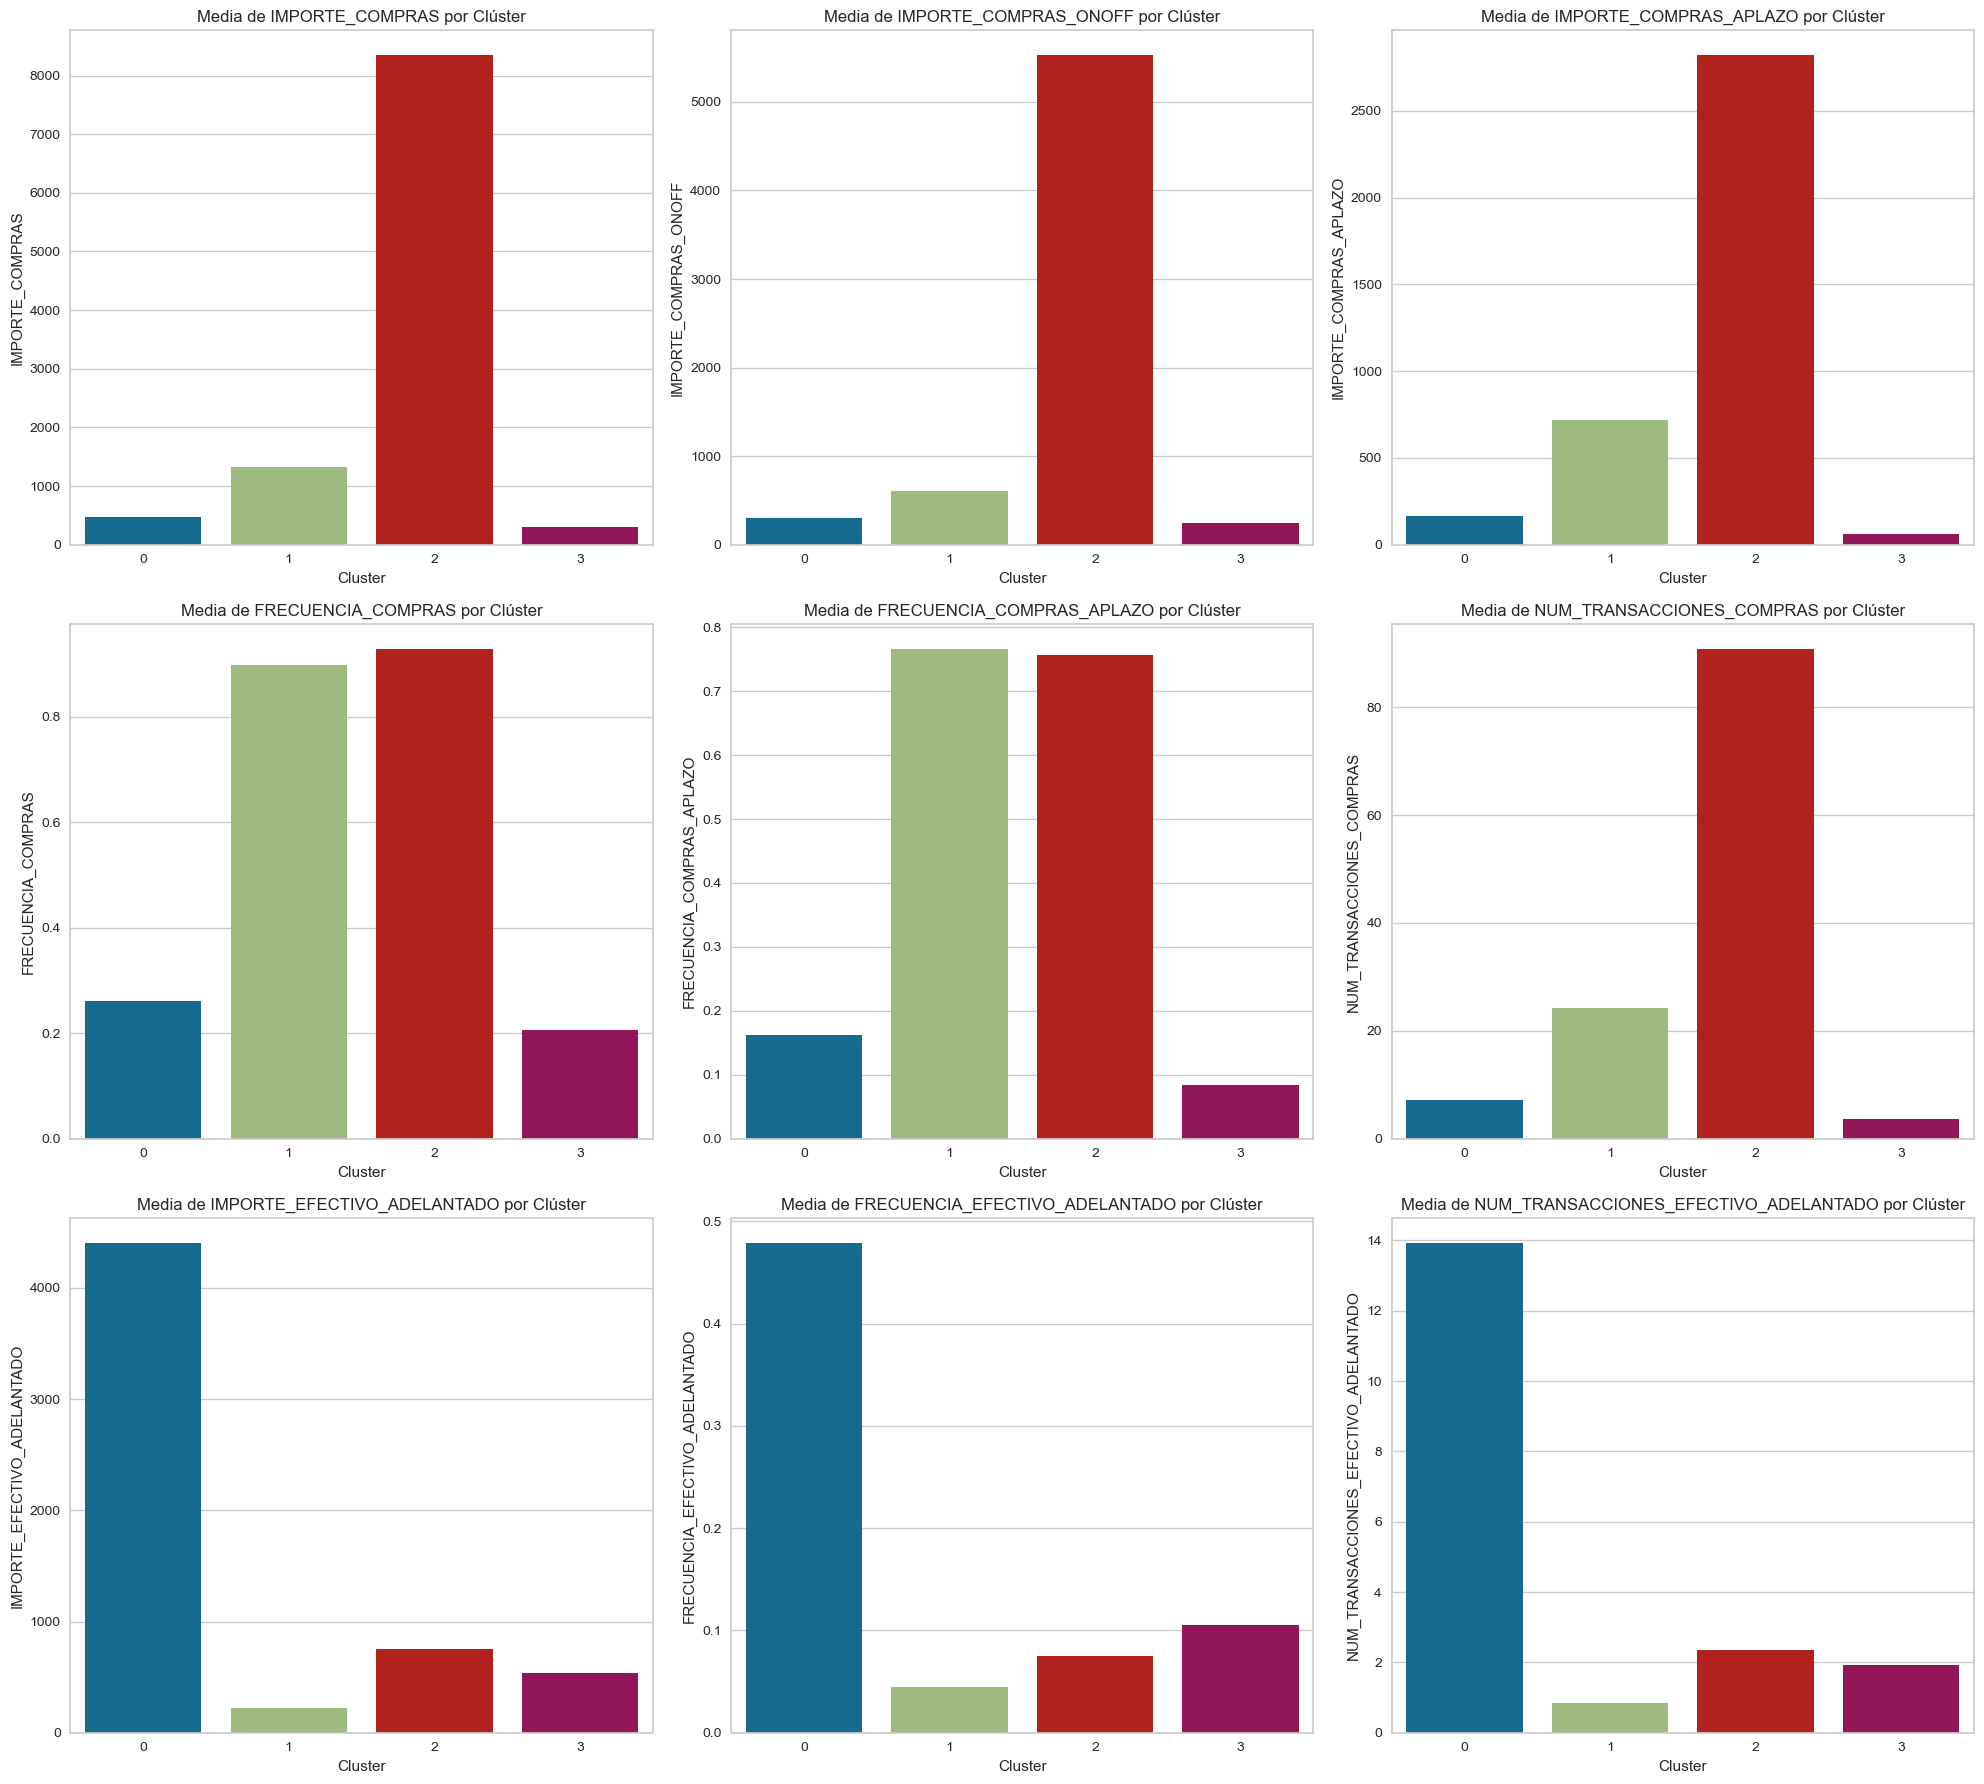

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'kmeans.labels_' son etiquetas de cluster
df['Cluster'] = kmeans.labels_

# Variables significativas basadas en las cargas de PCA para PC1 y PC2
significant_variables = [
    'IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 'IMPORTE_COMPRAS_APLAZO', 
    'FRECUENCIA_COMPRAS', 'FRECUENCIA_COMPRAS_APLAZO', 'NUM_TRANSACCIONES_COMPRAS', 
    'IMPORTE_EFECTIVO_ADELANTADO', 'FRECUENCIA_EFECTIVO_ADELANTADO', 
    'NUM_TRANSACCIONES_EFECTIVO_ADELANTADO'
]

# Calcula las medias para estas variables significativas
cluster_means = df.groupby('Cluster')[significant_variables].mean().reset_index()

# Establecer el tamaño de la figura total
plt.figure(figsize=(20, 18))

# Graficar cada variable significativa en una línea de tres gráficos
for i, variable in enumerate(significant_variables):
    # Crear un subplot para cada variable
    plt.subplot(len(significant_variables) // 3 + len(significant_variables) % 3, 3, i + 1)
    sns.barplot(x='Cluster', y=variable, data=cluster_means)
    plt.title(f'Media de {variable} por Clúster')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()



<span style="color: darkblue;">

Basándonos en los gráficos de barras y considerando el contexto de un banco que busca personalizar las comunicaciones de tarjetas de crédito, podemos intentar interpretar los clusters de la siguiente manera:

* Cluster 0: Este grupo de clientes tiene una alta media en IMPORTE_EFECTIVO_ADELANTADO, pero es bajo en las FRECUENCIAS_EFECTIVO_ADELANTADO y NUM_TRANSACCIONES_EFECTIVO_ADELANTADO, lo que podría indicar que estos clientes tienden a realizar adelantos de efectivo en grandes cantidades pero con poca frecuencia. Podrían responder bien a ofertas o promociones relacionadas con líneas de crédito o préstamos.

* Cluster 1: Estos clientes tienen valores medios en la mayoría de las variables significativas, pero se destacan por tener la frecuencia de compras a plazo (FRECUENCIA_COMPRAS_APLAZO) y el número de transacciones de compras (NUM_TRANSACCIONES_COMPRAS) más altos. Este grupo podría estar interesado en opciones de financiamiento o beneficios relacionados con pagos a plazo, lo que los hace candidatos ideales para promociones de tarjetas de crédito que ofrezcan condiciones favorables en compras a plazo.

* Cluster 2: Este cluster tiene el IMPORTE_COMPRAS más alto, lo que sugiere que estos clientes son grandes gastadores en términos de compras. Sin embargo, tienen un número relativamente bajo de transacciones (NUM_TRANSACCIONES_COMPRAS). Podrían ser los que hacen compras significativas pero no con tanta frecuencia, tal vez debido a un mayor poder adquisitivo. Las comunicaciones de marketing para este grupo podrían enfocarse en beneficios exclusivos o recompensas por grandes compras.

* Cluster 3: Los clientes en este grupo tienen los valores más bajos en todas las variables significativas. Esto podría indicar un grupo de clientes más conservador o menos activo en términos de uso de tarjeta de crédito y banca digital. Las estrategias para este segmento podrían incluir incentivos para aumentar la frecuencia y el importe de las compras, como puntos de bonificación o cashback por actividad en la cuenta.

Sugerencias para Acciones Comerciales:

* Cluster 0: Enfocarse en productos de crédito con beneficios en términos de adelantos de efectivo o préstamos personales.

* Cluster 1: Ofrecer tarjetas de crédito con planes de pago a plazo o financiamiento sin intereses para atraer a clientes que valoran la flexibilidad en los pagos.

* Cluster 2: Crear programas de recompensa o descuentos en tiendas asociadas que beneficien las compras grandes, apelando a su tendencia a gastar más en cada transacción.

* Cluster 3: Diseñar campañas que incentiven el uso de la tarjeta y la banca digital, tal vez ofreciendo tutoriales o beneficios por el primer uso o la configuración de pagos automáticos.